In [41]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
import cv2 
import os
import csv
from stn import spatial_transformer_network as transformer
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [42]:
def order(n):
    l=[]
    for x in range(10):
        if n == x :
            l.append(1)
        else:
            l.append(0)
    return l

print(order(8))
    

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [43]:
def loaddata(s):
    num=[]
    real=[]
    for x in os.listdir(s):
        for y in os.listdir(s+'/'+x):
            im=cv2.imread(s+'/'+x+'/'+y,0)
            num.append(im/255)
            real.append(order(int(x)))
    return np.array(num),np.array(real)
            

In [44]:
num , real = loaddata('trainData')
num = np.ravel(num).reshape((7490,28, 28,1))
print(num.shape)
print(real.shape)

(7490, 28, 28, 1)
(7490, 10)


In [45]:
im_train,im_test, im_ytrain,im_ytest  = train_test_split(num,real,test_size=0,random_state=1) 
print(im_train.shape,im_test.shape, im_ytrain.shape,im_ytest.shape)

(7490, 28, 28, 1) (0, 28, 28, 1) (7490, 10) (0, 10)


In [46]:
model= Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Dense(10, activation='softmax'))
# opt = Adam(lr=1e-4)
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
__________

In [47]:
history = model.fit(im_train, im_ytrain,batch_size=128,epochs=20,verbose=1,validation_split=0.1)
score = model.evaluate(im_train, im_ytrain, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6741 samples, validate on 749 samples
Epoch 1/20
6741/6741 [==============================] - 33s 5ms/step - loss: 1.4681 - acc: 0.5320 - val_loss: 0.3908 - val_acc: 0.8758
Epoch 2/20
6741/6741 [==============================] - 28s 4ms/step - loss: 0.4144 - acc: 0.8712 - val_loss: 0.0864 - val_acc: 0.9773
Epoch 3/20
6741/6741 [==============================] - 28s 4ms/step - loss: 0.1945 - acc: 0.9536 - val_loss: 0.0281 - val_acc: 0.9960
Epoch 4/20
6741/6741 [==============================] - 27s 4ms/step - loss: 0.1191 - acc: 0.9733 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 5/20
6741/6741 [==============================] - 28s 4ms/step - loss: 0.0777 - acc: 0.9859 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 6/20
6741/6741 [==============================] - 28s 4ms/step - loss: 0.0575 - acc: 0.9896 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 7/20
6741/6741 [==============================] - 28s 4ms/step - loss: 0.0429 - acc: 0.9924 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 8/

In [14]:
# # for x in range(1,20):
# #     print(np.argmax(pred[x]))
# #     plt.imshow(test[x].reshape((28, 28)))
# #     plt.show()

# pred = model.predict(im_train, verbose=1)
# grid_x = 10
# grid_y = 5
# plt.figure(figsize=(1*grid_x, 2*grid_y))
# for y in range(grid_y):
#     for x in range(grid_x):
#         index = x + (grid_x * y)
#         plt_index = x + (grid_x * y)
#         plt.subplot(2*grid_y, grid_x, 1+plt_index)
#         img_index = index
#         plt.imshow(im_train[img_index ].reshape((28, 28)),cmap='gray')
#         plt.xticks([],[])
#         plt.yticks([],[])
#         plt.title(str(np.argmax(pred[img_index ])))
# plt.tight_layout()
# plt.show()

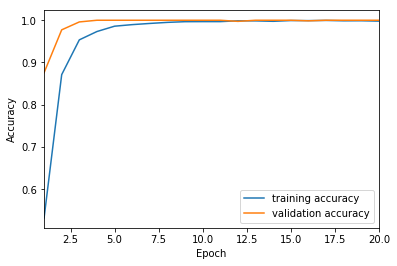

In [49]:
xs = list(range(1,1+len(history.history['acc'])))
plt.plot(xs, history.history['acc'], label='training accuracy')
plt.plot(xs, history.history['val_acc'], label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(1, len(xs))
# file_helper.save_figure('mnist-history')
plt.show()

In [50]:
s='testData/DigitTest'
name=[]
imm=[]
for x in os.listdir(s):
    im=cv2.imread(s+'/'+x,0)
    imm.append(im/256)
    name.append(os.path.splitext(x)[0])
test=np.array(imm).reshape((2510, 28, 28,1))
test.shape

(2510, 28, 28, 1)

In [51]:
pred = model.predict(test, verbose=1)

2510/2510 [==============================] - 3s 1ms/step


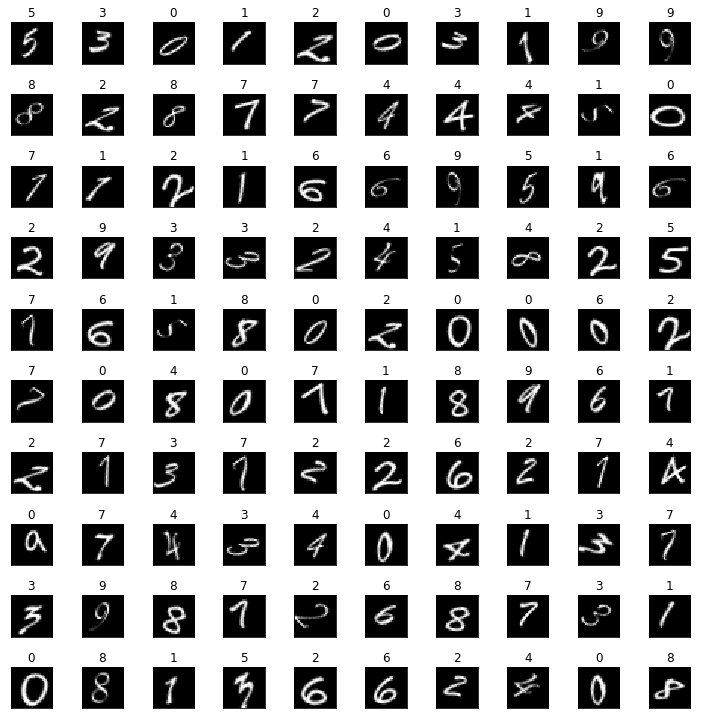

In [52]:
# for x in range(1,20):
#     print(np.argmax(pred[x]))
#     plt.imshow(test[x].reshape((28, 28)))
#     plt.show()


grid_x = 10
grid_y = 10
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+1000
        plt.imshow(test[img_index ].reshape((28, 28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred[img_index ])))
plt.tight_layout()
plt.show()

In [53]:
with open('160260020_Testresults.csv', mode='w') as pre:
    pre_writer = csv.writer(pre, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    pre_writer.writerow(['Id', 'Category'])
    for x in range(test.shape[0]):
        pre_writer.writerow([name[x],np.argmax(pred[x])])

In [ ]:
784 - [32C3-32C3-32C5S2] d(0.4) - [64C3-64C3-64C5S2] d(0.4) - 64 d(0.4) - 10   and (batch=128 epoch =25) == 0.9123
final loss prop -> accuracy 


In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(im_train)